In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (12,6)

# NumPy

**Задача 1**\
Сгенерировать массив из случайных положительных чисел произвольной длины. Вывести элементы, которые больше среднего арифметического.

In [2]:
import random

size = 20  
min_value = 0
max_value = 100 
l = np.array([random.randint(min_value, max_value) for _ in range(size)])

l

array([  6,  80,  11,  47, 100,   3,  65,  72, 100,  19,  69,  46,   0,
        16,  94,  99,  63,  57,   7,  56])

In [3]:
l[l>np.mean(l)] #Значения больше среднего

array([ 80, 100,  65,  72, 100,  69,  94,  99,  63,  57,  56])

**Задача 2**\
Сгенерировать массив из 20 случайных элементов, элементы которого лежат в интервале [0, 10].
+ Определить количество элементов, отличающихся от минимального на 5.
+ Найти среднее арифметическое всех четных элементов массива, стоящих на нечетных местах.

In [4]:
size = 20
min_value = 0
max_value = 10
l = np.array([random.randint(min_value, max_value) for _ in range(size)])

print(l)

[ 2  2  8  9  8  7 10  3  9  0  2 10  4  2  2  6  1  3  0  7]


In [5]:
print('Rоличество элементов, отличающихся от минимального на 5:', len((l[l == np.min(l)+5])))

Rоличество элементов, отличающихся от минимального на 5: 0


In [6]:
odd_index_elements = l[1::2]
even_elements = odd_index_elements[odd_index_elements % 2 == 0]
mean_of_evens = np.mean(even_elements) if len(even_elements) > 0 else 0

print(f"Массив: {l}")
print(f"Чётные элементы на нечётных местах: {even_elements}")
print(f"Среднее арифметическое: {mean_of_evens}")

Массив: [ 2  2  8  9  8  7 10  3  9  0  2 10  4  2  2  6  1  3  0  7]
Чётные элементы на нечётных местах: [ 2  0 10  2  6]
Среднее арифметическое: 4.0


**Задача 3**\
Сгенерировать матрицу A размером 5 на 5, элементы которой лежат в интервале [1, 10].
+ Возвести в квадрат максимальный элемент матрицы.
+ Все четные числа заменить на 0.

In [7]:
a = np.random.randint(0, 11, size=(5, 5))
a

array([[ 1, 10,  6,  9,  9],
       [ 2,  2,  0, 10,  1],
       [ 5, 10,  6,  7,  9],
       [10,  5,  2,  5,  6],
       [ 9,  1,  4,  3,  5]])

In [8]:
print('Квадрат максимального значения:',np.max(a)**2)

Квадрат максимального значения: 100


In [9]:
a[a%2==0] = 0
a

#Матрица с нулями вместо четных чисел

array([[1, 0, 0, 9, 9],
       [0, 0, 0, 0, 1],
       [5, 0, 0, 7, 9],
       [0, 5, 0, 5, 0],
       [9, 1, 0, 3, 5]])

**Задача 4**\
Сгенерировать матрицу B размером 5 на 5, элементы которой лежат в интервале [-5, 5]. Отрицательные элементы матрицы заменить на число отрицательных элементов в строке, в которой они находятся.

In [10]:
b = np.random.randint(-5, 6, size=(5, 5))
b

array([[ 0, -5, -5,  5, -5],
       [ 4, -2,  4, -4,  2],
       [ 4,  0,  4, -3,  1],
       [-5, -2,  5,  0, -3],
       [-4,  4, -2,  5,  5]])

In [11]:
cntr = 0
for i in range(len(b)):
    cntr = (len(b[i][b[i]<0]))
    b[i][b[i]<0] = cntr
b #С замененными отрицательными значениями   

array([[0, 3, 3, 5, 3],
       [4, 2, 4, 2, 2],
       [4, 0, 4, 1, 1],
       [3, 3, 5, 0, 3],
       [2, 4, 2, 5, 5]])

# Pandas

In [12]:
df = pd.read_csv("https://raw.githubusercontent.com/rolandmueller/titanic/main/titanic3.csv")

In [13]:
df.sample(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
323,2,0,"Abelson, Mr. Samuel",male,30.0,1,0,P/PP 3381,24.0000,NaN,C,NaN,NaN,"Russia New York, NY"
1296,3,0,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN,131.0,NaN
796,3,0,"Everett, Mr. Thomas James",male,40.5,0,0,C.A. 6212,15.1000,NaN,S,NaN,187.0,NaN


**Задание 1**
+ Какой была максимальная цена билета? Медиана?
+ Какова доля выживших?
+ Сколько мужчин / женщин находилось на борту?

In [14]:
print('Максимальная цена билета:',df['fare'].max())
print('Медианная цена билета:',df['fare'].median())
print('Доля выживших:', df['survived'].sum()/len(df))
print('Было', len(df[df['sex'] == 'male']), 'мужчин и', len(df[df['sex'] == 'female']), 'женщин')

Максимальная цена билета: 512.3292
Медианная цена билета: 14.4542
Доля выживших: 0.3819709702062643
Было 843 мужчин и 466 женщин


**Задание 2**
+ Выведите распределение переменной __pclass__ для мужчин и женщин.
    + Сколько мужчин было в первом классе?
    + Сколько женщин было в третьем классе?
      
+ Создайте новый признак __age_group__, который равен:
    + 1, если пассажир был моложе 30 лет;
    + 2, если пассажиру было от 30 до 60 лет;
    + 3, если пассажир был старше 60 лет.

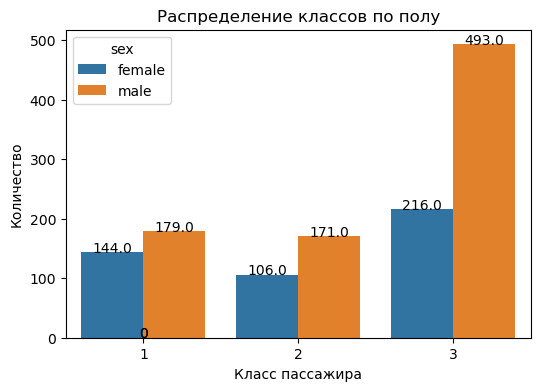

In [15]:
import seaborn as sns
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x="pclass", hue="sex")

for p in ax.patches:
    ax.annotate(p.get_height(), 
                (p.get_x() + p.get_width()/ 2., p.get_height()),  # координата X (центр столбца)
                ha='center')

plt.xlabel("Класс пассажира")
plt.ylabel("Количество")
plt.title("Распределение классов по полу")
plt.show()

Как следует из графика, 179 мужчин в первом классе и 216 женщин в 3-м классе

In [16]:
def get_age_group(age):
    if age <30:
        return 1
    elif age > 60:
        return 3
    elif 30 <= age <= 60:
        return 2
    else:
        return np.nan

# Добавление нового столбца с временем года
df['age_group'] = df['age'].apply(get_age_group)

In [17]:
df.sample(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_group
33,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,8,NaN,"Birkdale, England Cleveland, Ohio",2.0
527,2,0,"Parker, Mr. Clifford Richard",male,28.0,0,0,SC 14888,10.5000,NaN,S,NaN,NaN,"St Andrews, Guernsey",1.0
100,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,PC 17485,56.9292,A20,C,1,NaN,London / Paris,2.0


**Задание 3**\
Найдите самое популярное имя среди пассажиров:
+ мужчин;
+ женщин.

In [18]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_group
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1.0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1.0
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1.0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",2.0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1.0


In [19]:
#МУЖСКОЕ ИМЯ
df['first_name'] = df["name"].str.split(", ").str[1].str.split().str[1]
df[df['sex'] == 'male']['first_name'].value_counts().head(1)

first_name
William    50
Name: count, dtype: int64

In [20]:
#ЖЕНСКОЕ ИМЯ
df['first_name'] = df["name"].str.split(", ").str[1].str.split().str[1]
df[df['sex'] == 'female']['first_name'].value_counts().head(1)

first_name
William    16
Name: count, dtype: int64

Самое популярное женское имя - Вильям... Это произошло, т.к. данные необработаны. Нам сказано не делать предобработку, так что пускай останется как есть...

**Задание 4**
+ Выведите данные о всех пассажирах, которые сели в Cherbourg (Embarked='C') и были старше 50 лет.
+ Выведите данные о всех женщинах младше 20 и старше 50 лет.
+ Сколько пассажиров старше 70 лет было на борту?

In [21]:
cherbourg_50 = df[(df['embarked'] == 'C') & (df['age'] > 50)]
print(cherbourg_50)

     pclass  survived                                               name  \
9         1         0                            Artagaveytia, Mr. Ramon   
43        1         1    Bucknell, Mrs. William Robert (Emma Eliza Ward)   
48        1         1   Candee, Mrs. Edward (Helen Churchill Hungerford)   
50        1         1  Cardeza, Mrs. James Warburton Martinez (Charlo...   
78        1         1  Compton, Mrs. Alexander Taylor (Mary Eliza Ing...   
104       1         1                     Eustis, Miss. Elizabeth Mussey   
123       1         1                   Frolicher-Stehli, Mr. Maxmillian   
135       1         0                          Goldschmidt, Mr. George B   
136       1         1                          Gracie, Col. Archibald IV   
174       1         0                            Kent, Mr. Edward Austin   
186       1         1          Lindstrom, Mrs. Carl Johan (Sigrid Posse)   
192       1         1                               Lurette, Miss. Elise   
215       1 

In [22]:
women_young_old = df[(df['sex'] == 'female') & ((df['age'] < 20) | (df['age'] > 50))]
print(women_young_old)

      pclass  survived                                               name  \
2          1         0                       Allison, Miss. Helen Loraine   
6          1         1                  Andrews, Miss. Kornelia Theodosia   
8          1         1      Appleton, Mrs. Edward Dale (Charlotte Lamson)   
11         1         1  Astor, Mrs. John Jacob (Madeleine Talmadge Force)   
27         1         1            Bishop, Mrs. Dickinson H (Helen Walton)   
...      ...       ...                                                ...   
1265       3         0                          Van Impe, Miss. Catharina   
1273       3         0                 Vander Planke, Miss. Augusta Maria   
1279       3         0               Vestrom, Miss. Hulda Amanda Adolfina   
1300       3         1            Yasbeck, Mrs. Antoni (Selini Alexander)   
1304       3         0                               Zabour, Miss. Hileni   

         sex   age  sibsp  parch    ticket      fare    cabin embarked boat

In [23]:
passengers_70_plus = df[df['age'] > 70].shape[0]
print("Пассажиров старше 70 лет:", passengers_70_plus)

Пассажиров старше 70 лет: 6


**Задание 5**
+ Посчитайте средний возраст среди мужчин и среди женщин.
+ Посчитайте доли выживших в различных возрастных группах (новый признак **AgeGroup**).
+ Найдите максимальную стоимость билета в каждом из ценовых классов.

In [24]:
print('Средний возраст мужчин', df[df['sex'] == 'male']['age'].mean()) #
print('Средний возраст женщин', df[df['sex'] == 'female']['age'].mean()) #Средний возраст женщин

Средний возраст мужчин 30.5852329787234
Средний возраст женщин 28.6870706185567


In [25]:
for entry in [1.0, 2.0, 3.0]:
    print('В группе', entry, len(df[(df['age_group'] == entry) & (df['survived'] == 1)])/len(df[df['age_group'] == entry]), 'доля выживших')

В группе 1.0 0.4094903339191564 доля выживших
В группе 2.0 0.4189189189189189 доля выживших
В группе 3.0 0.24242424242424243 доля выживших


In [26]:
print('Максимальная стоимость билета в классе', df.groupby("pclass")["fare"].max())

Максимальная стоимость билета в классе pclass
1    512.3292
2     73.5000
3     69.5500
Name: fare, dtype: float64


**Задание 6**\
Ответьте на предыдущие вопросы с помощью функции crosstab и метода pivot_table.

In [29]:
mean_age_by_sex = df.pivot_table(values='age', index='sex', aggfunc='mean')
print("Средний возраст среди мужчин и женщин:\n", mean_age_by_sex)

survival_by_age_group = pd.crosstab(df['age_group'], df['survived'], normalize='index') * 100
print("Доли выживших в различных возрастных группах:\n", survival_by_age_group)

max_fare_by_pclass = df.pivot_table(values='fare', index='pclass', aggfunc='max')
print("Максимальная стоимость билета в каждом классе:\n", max_fare_by_pclass)

Средний возраст среди мужчин и женщин:
               age
sex              
female  28.687071
male    30.585233
Доли выживших в различных возрастных группах:
 survived           0          1
age_group                      
1.0        59.050967  40.949033
2.0        58.108108  41.891892
3.0        75.757576  24.242424
Максимальная стоимость билета в каждом классе:
             fare
pclass          
1       512.3292
2        73.5000
3        69.5500
